# Question 6  

The yield of a chemical process was measured using five batches of raw material, five acid concentrations, five standing times, $(A,B,C,D,E)$ and five catalyst concentrations $(\alpha, \beta, \gamma, \delta, \epsilon)$. The Graeco-Latin square that follows was used. Analyze the data from this ecperiment (use $\alpha = 0.05$) and draw conclusions.

In [2]:
library(agricolae)
library(DAAG)

In [23]:
batch <- factor(rep(1:5, times = 5))
conc <- factor(rep(1:5, each =5))
stand_time <- factor(rep(c("A","B","C","D","E",
                           "B","C","D","E","A",
                           "C","D","E","A","B",
                           "D","E","A","B","C",
                           "E","A","B","C","D")))
catalyst_conc <- factor(c("a", "g", "e", "b", "d",
                        "b", "d", "a", "g", "e",
                        "g", "e", "b", "d", "a",
                        "d", "a", "g", "e", "b",
                        "e", "b", "d", "a", "g"))
yield <- c(26, 18, 20, 15, 10,
           16, 21, 12, 15, 24,
           19, 18, 16, 22, 17,
           16, 11, 25, 14, 17,
           13, 21, 13, 17, 14)
data <- data.frame(batch, conc, stand_time, catalyst_conc, yield)

Conducting an ANOVA provides the following output.

In [22]:
model <- aov(yield ~ batch + conc + stand_time + catalyst_conc, data = data)
summary(model)

              Df Sum Sq Mean Sq F value   Pr(>F)    
batch          4   10.0    2.50   0.427 0.785447    
conc           4   24.4    6.10   1.043 0.442543    
stand_time     4  342.8   85.70  14.650 0.000941 ***
catalyst_conc  4   12.0    3.00   0.513 0.728900    
Residuals      8   46.8    5.85                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Analyzing the data we see that there is a statistically significant difference in the five standing times on the yield of the chemical process.

In [25]:
tukey <- TukeyHSD(model)
tukey$stand_time

,diff,lwr,upr,p adj
B-A,-8.0,-13.284751,-2.7152488,0.005163900
C-A,-4.8,-10.084751,0.4847512,0.077079698
D-A,-8.6,-13.884751,-3.3152488,0.003281477
E-A,-10.6,-15.884751,-5.3152488,0.000821856
C-B,3.2,-2.084751,8.4847512,0.308703386
D-B,-0.6,-5.884751,4.6847512,0.993969422
E-B,-2.6,-7.884751,2.6847512,0.483716476
D-C,-3.8,-9.084751,1.4847512,0.186903121
E-C,-5.8,-11.084751,-0.5152488,0.031735092
E-D,-2.0,-7.284751,3.2847512,0.694818847


In paritcular, we have a statistically significant difference between:  

B-A  
D-A  
E-A  
E-C  

We confirm model assumptions with residual plots and shapiro-wilk:


	Shapiro-Wilk normality test

data:  residuals(model)
W = 0.94721, p-value = 0.2167


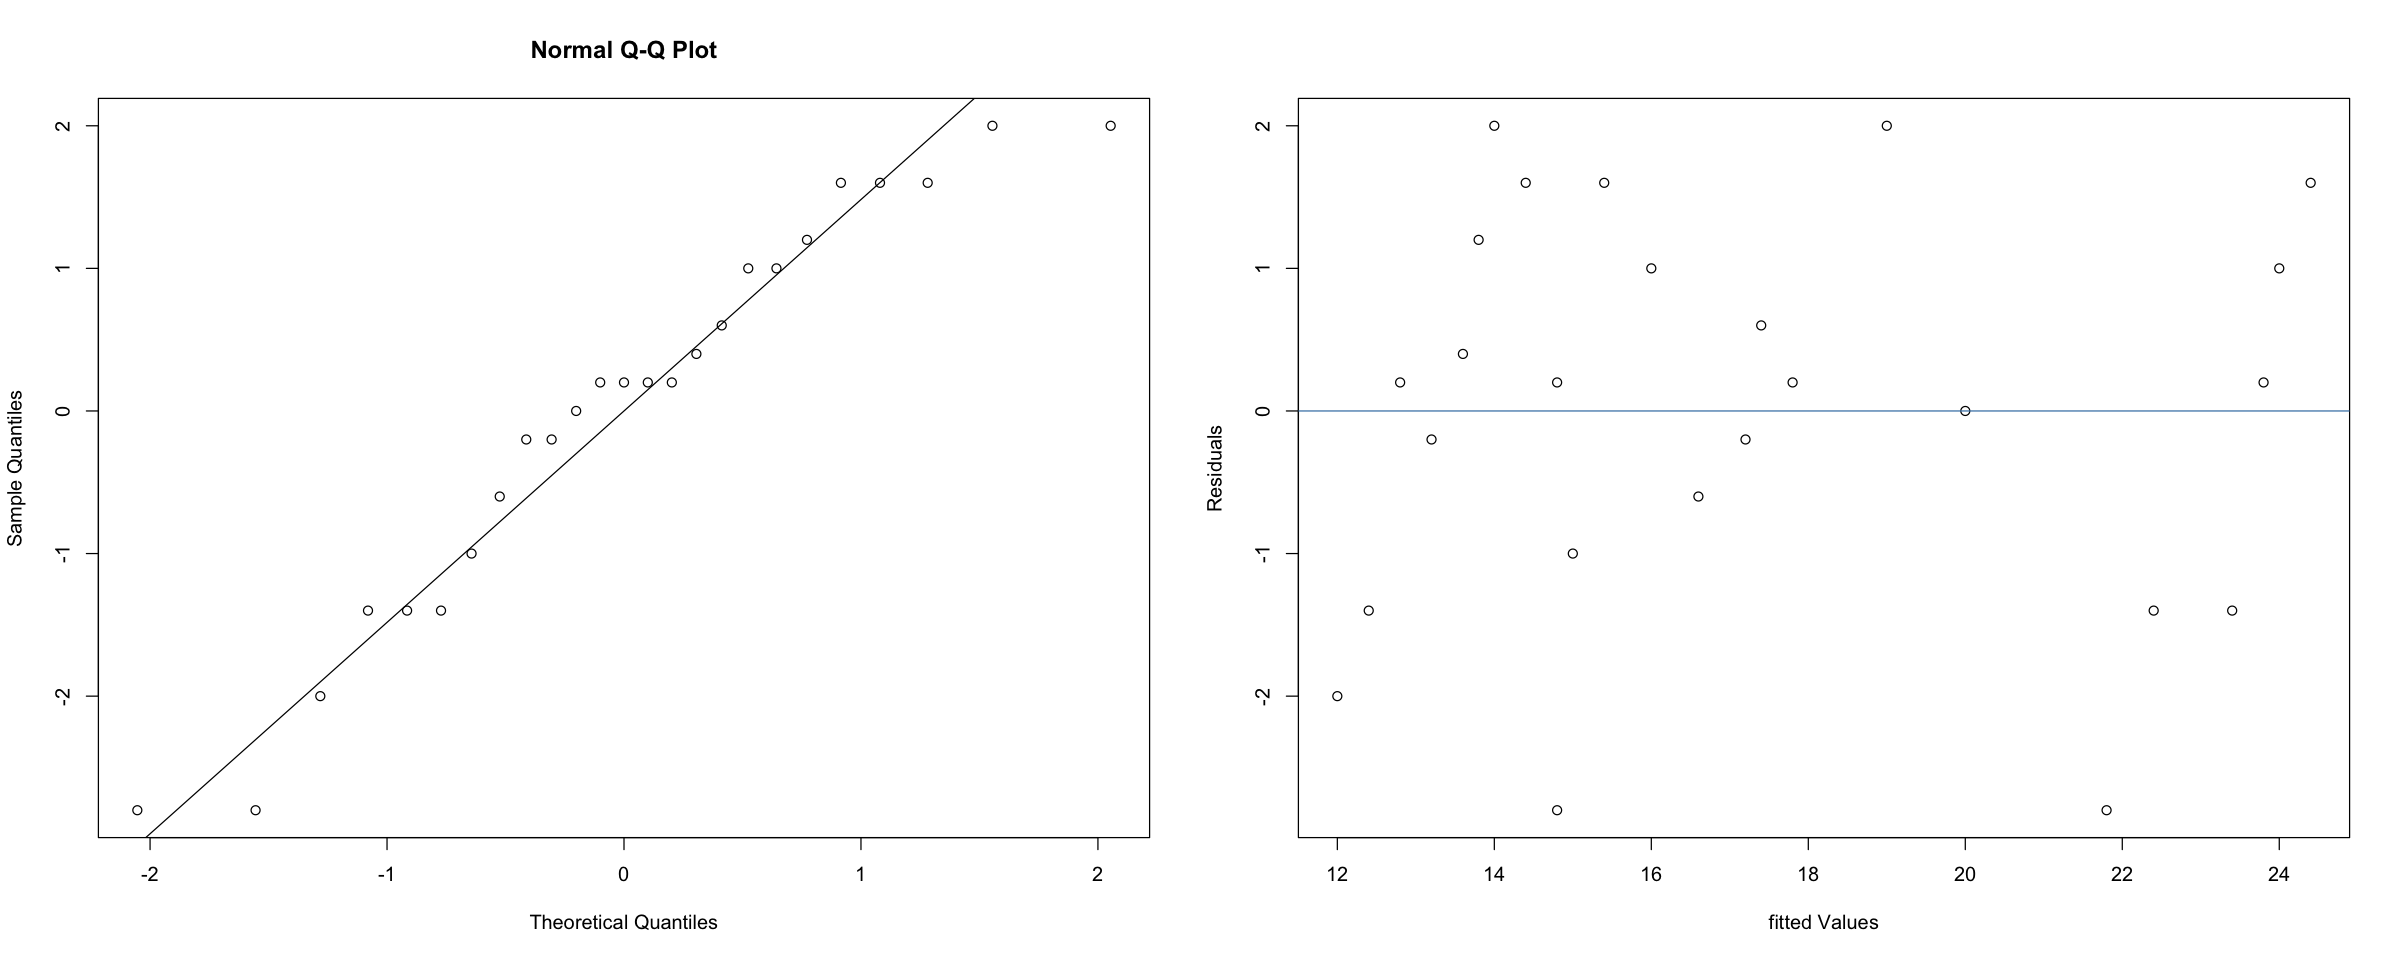

In [27]:
par(mfrow = c(1,2))
options(repr.plot.width = 20, repr.plot.height = 8)
# QQplot
qqnorm(residuals(model))
qqline(residuals(model))

# Fitted Values versus Residuals
plot(fitted(model), residuals(model), xlab = "fitted Values", ylab = "Residuals")
abline(h=0, col= "steelblue")

# Shapiro-Wilk
shapiro.test(residuals(model))

plots give no evidence that the model assumptions have been violated. The Shapiro-Wilk test confirms normality of residuals.